In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Setup Environment

In [ ]:
"""Install NSL package"""
!pip install --upgrade neural_structured_learning

     |████████████████████████████████| 122kB 2.7MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from neural_structured_learning.tools import graph_utils
import neural_structured_learning as nsl
import tensorflow_addons as tfa
from copy import deepcopy
import random
import os
import PIL
import time

tf.keras.backend.clear_session()
print("Version: ", tf.__version__)
print("keras", tf.keras.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
keras 2.4.0
Eager mode:  True
GPU is available


# 2.Generate AD Image Tfr Files

In [ ]:
from graph_data_processing import GraphDataProcess

In [ ]:
''' label definition: NonDemented - 0, VeryMildDemented - 1, MildDemented -2, ModerateDemented -3 '''
label_list = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
root_path = '/content/drive/My Drive/Projects/codes/graph_images/'

'''rename images in the graph_image folder'''
# GraphDataProcess.rename_images(label_list, root_path) 

'''count each label images'''
NUM=[]
for label in label_list: NUM.append(len(os.listdir(f'{root_path}{label}/')))
NUM

[3210, 2240, 896, 64]

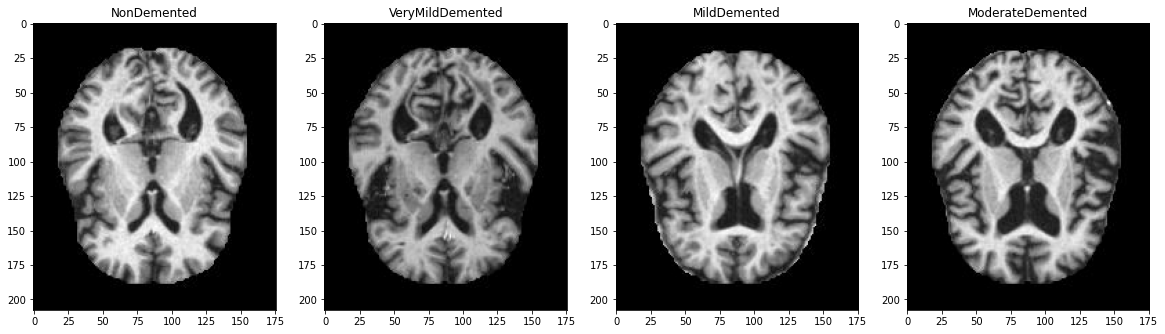

In [ ]:
'''label image plotting'''
plt.figure(figsize=(20,20))
for index, label in enumerate(label_list):
#     image = tf.keras.preprocessing.image.load_img(path=f'{root_path}{label_list[index]}/{index}_0.jpg', color_mode='rgb', target_size= (208,176),interpolation='nearest')
#     tensor = tf.keras.preprocessing.image.img_to_array(image)
    image_string = open(f'{root_path}{label_list[index]}/{index}_0.jpg', 'rb').read()
    image_tensor = tf.io.decode_jpeg(contents=image_string, channels=3, name=None)
    image_tensor = tf.image.resize(image_tensor, size=(208,176))
    ax = plt.subplot(1, 4, index + 1)
    plt.imshow(image_tensor/255)
    plt.title(label_list[index])

In [ ]:
'''Generate image tfr files'''
path_list = [f'{root_path}{label}/' for label in label_list]
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
# GraphDataProcess.generate_tfr_raw(path_list=path_list, tfr_list=tfr_list) 

In [ ]:
'''Parse image tfr files to image_tensor with size at 100*100 and 3 channels'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=20, 
                                                           size=(100,100),
                                                           channels=3,
                                                           shuffle=True)
dt = iter(image_dataset).get_next()
dt

{'id': <tf.Tensor: shape=(20,), dtype=string, numpy=
 array([b'0_2634.jpg', b'0_1394.jpg', b'0_2232.jpg', b'0_2352.jpg',
        b'0_360.jpg', b'0_2129.jpg', b'0_2059.jpg', b'0_3013.jpg',
        b'0_2878.jpg', b'0_1737.jpg', b'0_291.jpg', b'0_381.jpg',
        b'0_2335.jpg', b'0_2904.jpg', b'0_2365.jpg', b'0_2577.jpg',
        b'0_633.jpg', b'0_2865.jpg', b'0_2779.jpg', b'0_2677.jpg'],
       dtype=object)>,
 'image_tensor': <tf.Tensor: shape=(20, 100, 100, 3), dtype=float32, numpy=
 array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         

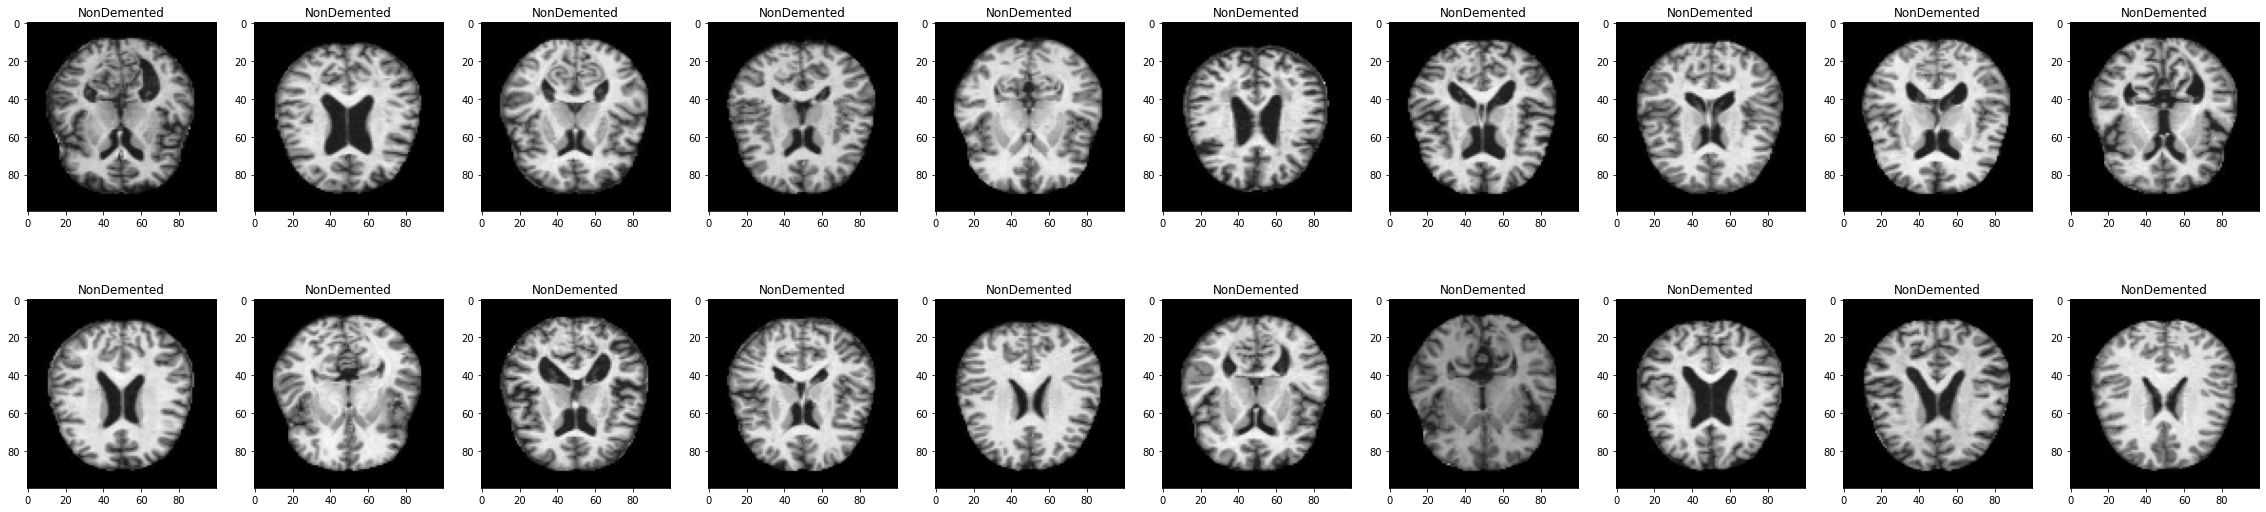

In [ ]:
'''Plot parsed image tensors with size at 100 * 100 and 3 channels'''
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(dt['image_tensor']):
    ax = plt.subplot(10, 10, img_index + 1)
    plt.imshow(img_tensor)
    plt.title(label_list[dt['label'].numpy()[img_index]])

In [ ]:
'''Parse image tfr files to image_tensor with size at 100 * 100 and 1 channel'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=20, 
                                                           size=(100,100),
                                                           channels=1,
                                                           shuffle=True)
dt = iter(image_dataset).get_next()
dt

{'id': <tf.Tensor: shape=(20,), dtype=string, numpy=
 array([b'0_1967.jpg', b'0_1328.jpg', b'0_2041.jpg', b'0_1924.jpg',
        b'0_981.jpg', b'0_2693.jpg', b'0_564.jpg', b'0_1776.jpg',
        b'0_1612.jpg', b'0_1518.jpg', b'0_1980.jpg', b'0_1236.jpg',
        b'0_1363.jpg', b'0_38.jpg', b'0_2692.jpg', b'0_324.jpg',
        b'0_1742.jpg', b'0_1154.jpg', b'0_696.jpg', b'0_249.jpg'],
       dtype=object)>,
 'image_tensor': <tf.Tensor: shape=(20, 100, 100, 1), dtype=float32, numpy=
 array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          

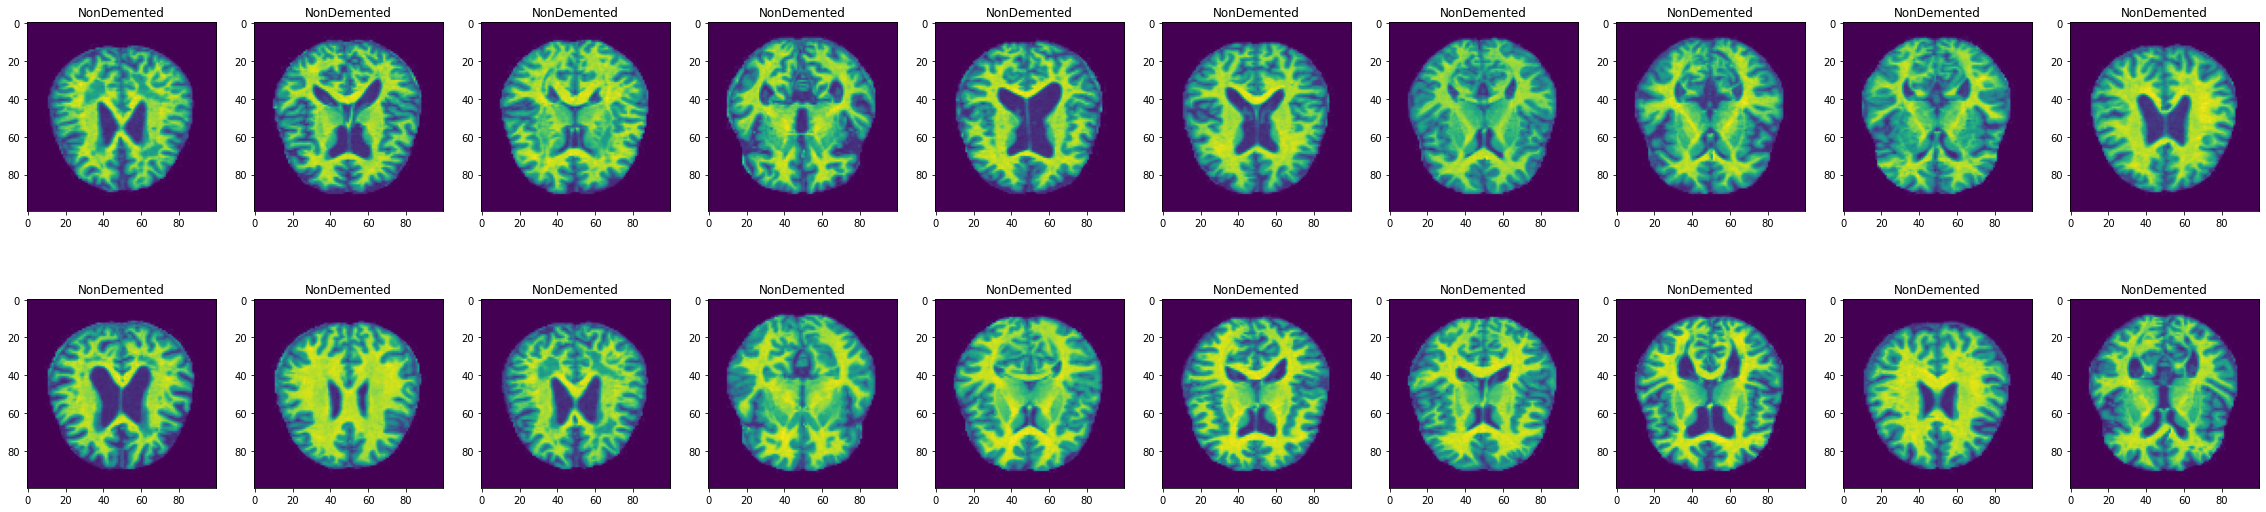

In [ ]:
'''Plot parsed image tensors with size at 100 * 100 and 1 channel'''
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(dt['image_tensor']):
    ax = plt.subplot(10, 10, img_index + 1)
    img_tensor = tf.reshape(img_tensor, shape=(100,100))
    plt.imshow(img_tensor)
    plt.title(label_list[dt['label'].numpy()[img_index]])

# 3.Generate Image Representation with AAE

In [ ]:
from AAE_model import AAE

In [ ]:
'''Generate vae represents'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
latent_dim = 128
learning_rate = 0.0002
channels = 3
real_mean = 0
real_std = 1
batch = 1
size=(100, 100)
epochs= 1
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=batch, 
                                                           size= size, 
                                                           channels= channels, 
                                                           shuffle=True)
aae = AAE(latent_dim=latent_dim, 
          image_channels=channels,
          aae_optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,amsgrad=True))
path = '/content/drive/My Drive/Projects/codes/AAE_model_checkpoints/aae_model_checkpoints'
aae.load_weights(path)

In [ ]:
aae.fit(image_dataset=image_dataset,
        checkpoints_path=path,
        batch_size=1,
        real_mean=real_mean,
        real_std=real_std,
        epochs=epochs,)

epoch:  1, epoch_time: 52.58522, total_loss: 2.37579, discriminator_loss: 1.38629, generator_loss: 0.69326, reconstruction_loss: 0.29624


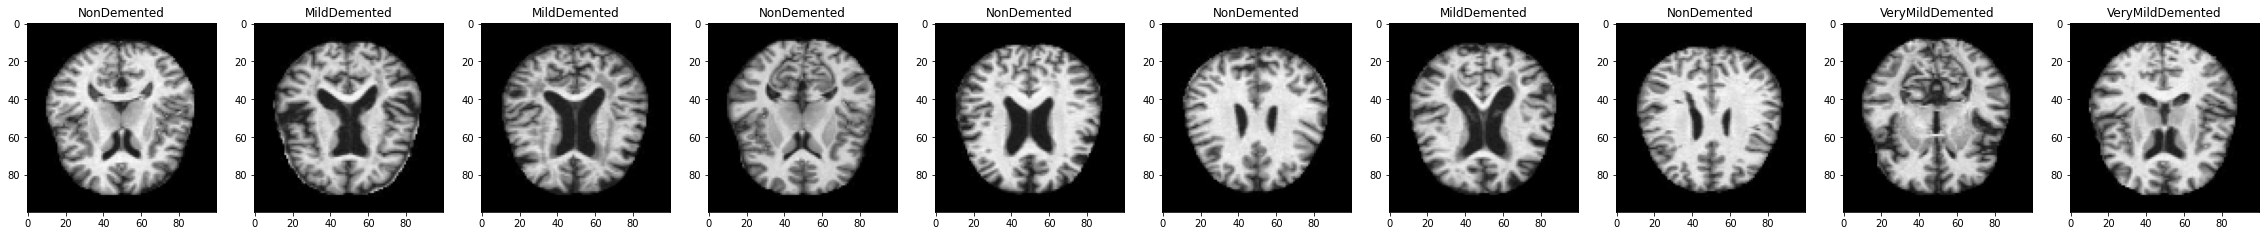

In [ ]:
'''Plot real images vs reconstructed images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=10, 
                                                           size=(100,100),
                                                           channels=3,
                                                           shuffle=True)
data = iter(image_dataset).get_next()
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(data['image_tensor']):
    plt.subplot(1, 10, img_index + 1)
    plt.imshow(img_tensor)
    plt.title(label_list[data['label'].numpy()[img_index]])

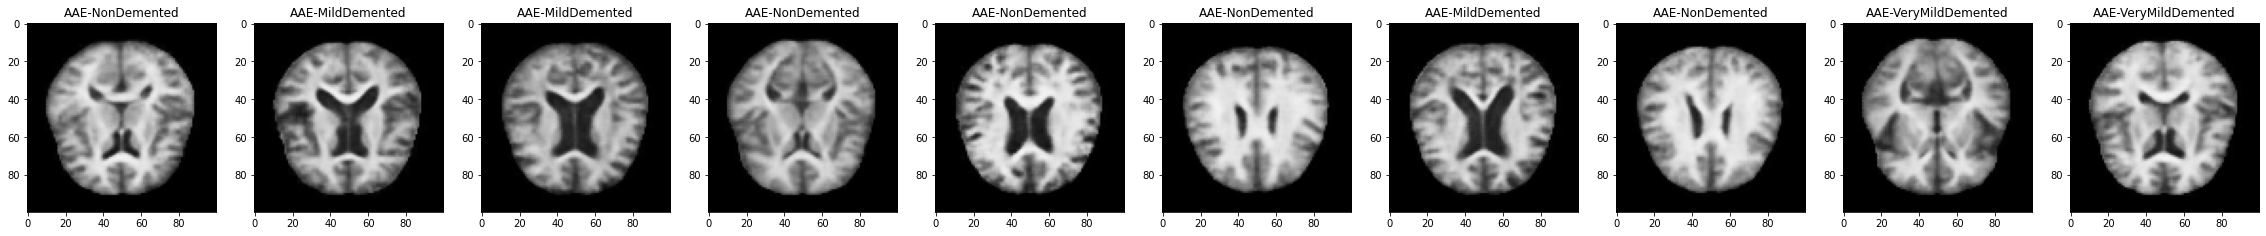

In [ ]:
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(data['image_tensor']):
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    _m, _l, rep = aae.encoder(img_tensor)
    img_new = aae.decoder(rep)
    img_new = tf.squeeze(img_new, axis=0)
    plt.subplot(1, 10, img_index + 1)
    plt.imshow(tf.abs(img_new))
    plt.title('AAE-'+label_list[data['label'].numpy()[img_index]])

In [ ]:
'''generate image represents tfr files'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
img_data_list = [ GraphDataProcess.parse_tfr_to_image_tensor(path_list=[tfr_path], batch_size=1, size=(100,100), channels=3, shuffle=False) for tfr_path in tfr_list]
print(*img_data_list,sep='\n')
GraphDataProcess.generate_tfr_aae_represent(image_dataset_list=img_data_list, aae_model=aae, tfr_rep_path=tfr_rep_list)

<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>


In [ ]:
'''parse image represents tfr files'''
img_rep_dataset = GraphDataProcess.parse_tfr_to_image_rep(path_list=tfr_rep_list, rep_dim= 128, batch_size=1, shuffle=False)
iter(img_rep_dataset).get_next()

{'id': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'0_782'], dtype=object)>,
 'label': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>,
 'representation': <tf.Tensor: shape=(1, 128), dtype=float32, numpy=
 array([[ 0.29885095, -0.3917478 , -0.28767163, -0.422351  , -0.9642367 ,
         -0.11979766,  0.79155254,  0.79298294, -0.7712217 , -1.016762  ,
         -0.54604983, -0.63413554, -0.16715068, -0.85921896, -0.10809669,
         -0.71280634, -0.2769754 ,  2.392247  ,  0.05875624, -0.7617106 ,
         -0.07853134, -0.7299392 , -0.04130859, -0.05867484, -0.3803113 ,
          0.35152748,  0.09688206,  2.780884  ,  2.0496714 , -0.6693509 ,
         -1.1705155 , -1.2401339 , -0.5799698 , -0.45980027, -0.56023234,
         -0.4127726 , -0.7693521 , -1.175786  , -0.1531268 , -0.40501723,
          2.40318   , -0.21749948, -0.5453697 ,  0.36393073,  2.8674164 ,
         -0.6795097 ,  0.8364142 ,  0.40886635,  0.5305733 , -0.1516369 ,
         -0.7290973 , -0.7467371 ,  1.02

# 4.Generate Image Graphs

In [ ]:
'''generate graphs without clustering'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]

cosine_similarity_threshold=0.95
# generate graph without cluster
for path_index, path in enumerate(tfr_rep_list):
    nsl.tools.build_graph(embedding_files = [path], 
                          output_graph_path = tsv_graph_list[path_index], 
                          similarity_threshold= cosine_similarity_threshold,
                          id_feature_name='id', 
                          embedding_feature_name='representation')

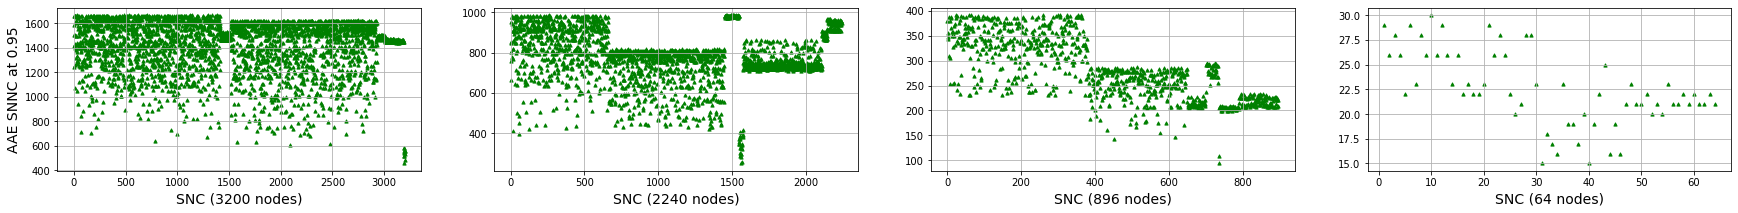

In [ ]:
"""plot the count of neighbour nodes of each seed node"""
plt.figure(figsize=(30,3))
for index, path in enumerate(tsv_graph_list):
    graph = nsl.tools.read_tsv_graph(path)
    nbr_count=[]
    for key in graph.keys():
        nbr_count.append(len(graph[f'{key}'].keys()))

    plt.subplot(1, 4, index + 1)
    plt.scatter(np.linspace(1,len(nbr_count), len(nbr_count)),nbr_count, s=10, c='g', marker='^')
    plt.xlabel(f'SNC ({len(graph.keys())} nodes)', fontsize = 14)
    if index==0:
      plt.ylabel('AAE SNNC at 0.95', fontsize=14)
    title = f'{label_list[index]}'
    # plt.title(title)
    plt.grid()

## Generate Image Graphs with Kmeans clustering

In [ ]:
from Kmeans import KMeans, KMeansModels

In [ ]:
'''load image represents data for K value searching for each label images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
img_rep_data_list = [GraphDataProcess.parse_tfr_to_image_rep(path_list=[path], rep_dim= 128, batch_size=3500, shuffle=False) for path in tfr_rep_list]

In [ ]:
iter(img_rep_data_list[3]).get_next()

{'id': <tf.Tensor: shape=(64,), dtype=string, numpy=
 array([b'3_22', b'3_45', b'3_23', b'3_26', b'3_33', b'3_57', b'3_38',
        b'3_13', b'3_47', b'3_10', b'3_35', b'3_37', b'3_17', b'3_12',
        b'3_46', b'3_9', b'3_11', b'3_6', b'3_49', b'3_16', b'3_62',
        b'3_15', b'3_50', b'3_52', b'3_40', b'3_20', b'3_3', b'3_43',
        b'3_32', b'3_56', b'3_36', b'3_55', b'3_25', b'3_53', b'3_1',
        b'3_41', b'3_58', b'3_63', b'3_18', b'3_2', b'3_34', b'3_61',
        b'3_44', b'3_0', b'3_51', b'3_60', b'3_8', b'3_27', b'3_39',
        b'3_24', b'3_21', b'3_5', b'3_54', b'3_42', b'3_28', b'3_19',
        b'3_14', b'3_59', b'3_7', b'3_4', b'3_29', b'3_30', b'3_48',
        b'3_31'], dtype=object)>,
 'label': <tf.Tensor: shape=(64,), dtype=int64, numpy=
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])>,
 'represen

epoch:  2 ,miss_centroid:  tf.Tensor(
[ 0.09498782 -1.0882578  -0.5257795  -0.21925059 -1.0353012   1.2596147
  2.1958942   0.22458261 -0.2636776  -0.9426335  -0.574458   -0.03377259
 -0.1297812  -0.83332354 -0.18448117 -0.54263556  0.81447726  1.0919405
  0.3339079   0.9388523   0.55333304 -0.3711923   0.11496051 -0.03124317
 -0.20134492  1.5420852  -0.54805386  0.833259    2.5044699   0.7802732
 -0.3647861  -0.6976416  -0.4409691  -0.27610725  0.15680504 -0.42571816
 -0.37906766 -0.7468833   0.15602617 -0.7439213   1.0267196   0.1661593
 -0.9565644  -0.22957775  1.3737347  -0.2612195   0.6076975   0.48017678
  0.24736103 -0.19768596 -0.847736   -0.8754717   0.3596079   0.22599752
  3.1924014   0.55974615 -0.42064106  1.401194   -0.53183454 -0.35559505
 -0.18219328 -0.62490964 -0.34757814 -0.07080507  1.1551467   1.7611489
 -0.17095193  0.17446542 -0.27824587 -0.7571891  -0.64517796 -1.1556692
 -0.22696431 -0.261927    1.3666475  -0.41994065 -1.2496465   0.18178278
  0.064933   -0.313

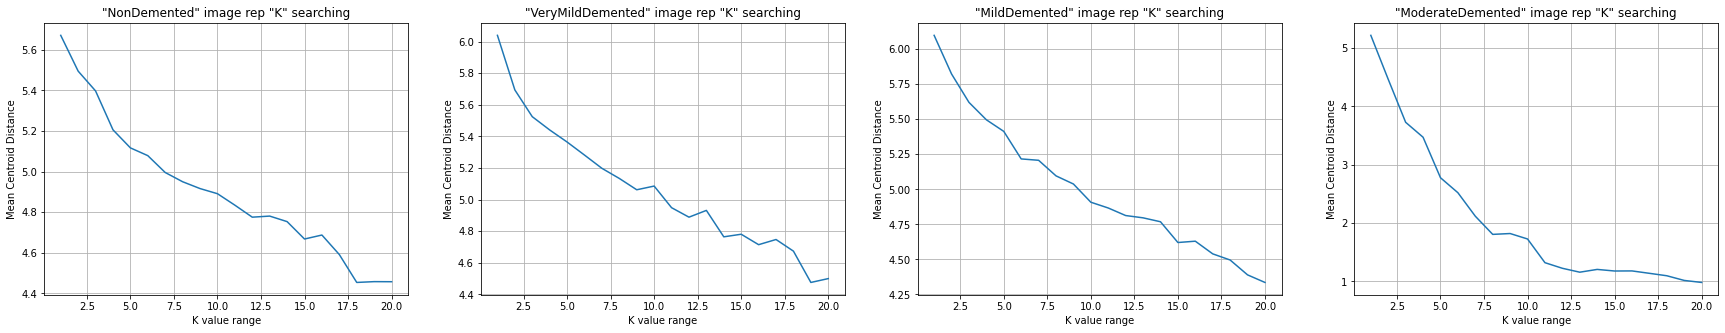

In [ ]:
'''searching K value for each label data'''
K_limit=20
epoch_per_K=30
plt.figure(figsize=(30,5))
for data_index, data in enumerate(img_rep_data_list):
    data_rep = iter(data).get_next()['representation']
    kmeans = KMeans(data=data_rep, K=1)
    kmeans.set_centroids(optimize=True)
    
    c_means_clc, K_limit = kmeans.searching_K(K_limit=K_limit, epoch_per_K=epoch_per_K, verbose=0)
    
    plt.subplot(1, 4, data_index + 1)
    plt.plot(np.linspace(1, K_limit, K_limit), c_means_clc)
    title = f'"{label_list[data_index]}" image rep "K" searching'
    plt.title(title)
    plt.xlabel('K value range')
    plt.ylabel('Mean Centroid Distance')
    plt.grid()

In [ ]:
"""generate K_means models for each label data"""
batch= 5000
rep_dim= 128
K_value_list = [7,8,8,5] # for both train and test data
epoch= 30
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
Kmeans_model_list = KMeansModels.generate_model_list(path_list = tfr_rep_list, rep_dim=rep_dim, K_list=K_value_list, epoch=epoch, batch=batch)


====================== Model 0 training ======================

epoch:  1 ,centroid mean:  0.07440162
epoch:  2 ,centroid mean:  0.07898287
epoch:  3 ,centroid mean:  0.073171996
epoch:  4 ,centroid mean:  0.068822436
epoch:  5 ,centroid mean:  0.06423383
epoch:  6 ,centroid mean:  0.05864804
epoch:  7 ,centroid mean:  0.05405527
epoch:  8 ,centroid mean:  0.04994091
epoch:  9 ,centroid mean:  0.047134735
epoch:  10 ,centroid mean:  0.045148965
epoch:  11 ,centroid mean:  0.043537248
epoch:  12 ,centroid mean:  0.042266198
epoch:  13 ,centroid mean:  0.041512422
epoch:  14 ,centroid mean:  0.040697116
epoch:  15 ,centroid mean:  0.040234376
epoch:  16 ,centroid mean:  0.039599
epoch:  17 ,centroid mean:  0.039110128
epoch:  18 ,centroid mean:  0.03894842
epoch:  19 ,centroid mean:  0.038823992
epoch:  20 ,centroid mean:  0.038811233
epoch:  21 ,centroid mean:  0.038941912
epoch:  22 ,centroid mean:  0.038910784
epoch:  23 ,centroid mean:  0.03900457
epoch:  24 ,centroid mean:  0.03925

In [ ]:
Kmeans_model_list

In [ ]:
'''generate all AD image into one graph with clustering'''
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
complete_graph = GraphDataProcess.generate_complete_graph_with_cluster_kmeans(tfr_rep_path_list= tfr_rep_list,
                                                                              prefix_list= [0,1,2,3], 
                                                                              model_list= Kmeans_model_list, 
                                                                              represent_dim= 128, 
                                                                              file_output_path= f'{root_path}AD_graph_aae_kmeans.tsv',
                                                                              similarity_threshold=0.90)
complete_graph

{'0c4': {'0c0': 0.955166, '0c5': 0.907787, '0c7': 0.911693},
 '0c0': {'0c1': 0.97017,
  '0c3': 0.958188,
  '0c4': 0.955166,
  '0c5': 0.916935,
  '0c6': 0.926841,
  '0c7': 0.954988},
 '0c7': {'0c0': 0.954988,
  '0c1': 0.905667,
  '0c3': 0.926953,
  '0c4': 0.911693,
  '0c6': 0.926189},
 '0c5': {'0c0': 0.916935, '0c4': 0.907787},
 '0c6': {'0c0': 0.926841, '0c3': 0.912007, '0c7': 0.926189},
 '0c3': {'0c0': 0.958188, '0c1': 0.9107, '0c6': 0.912007, '0c7': 0.926953},
 '0c1': {'0c0': 0.97017, '0c2': 0.922758, '0c3': 0.9107, '0c7': 0.905667},
 '0c2': {'0c1': 0.922758},
 '0_2594': {'0_1066': 0.922248,
  '0_1111': 0.923503,
  '0_1159': 0.926596,
  '0_1245': 0.923008,
  '0_1620': 0.924633,
  '0_1671': 0.908546,
  '0_1753': 0.931008,
  '0_1792': 0.941477,
  '0_2221': 0.917244,
  '0_2576': 0.915133,
  '0_2592': 0.905681,
  '0_2688': 0.906138,
  '0_2758': 0.908228,
  '0_2908': 0.924772,
  '0_3079': 0.911231,
  '0_390': 0.985796,
  '0_844': 0.903126,
  '0_987': 0.969614,
  '0_993': 0.91312},
 '0_2576

In [ ]:
node_count = [len(complete_graph[key]) for key in complete_graph.keys()]
print(node_count)

[1, 4, 4, 5, 3, 6, 2, 3, 2, 3, 2, 14, 14, 29, 13, 12, 7, 16, 12, 6, 27, 12, 20, 29, 34, 22, 2, 2, 3, 1, 1, 14, 16, 11, 20, 14, 14, 23, 6, 19, 13, 8, 4, 8, 2, 1, 1, 13, 10, 6, 13, 3, 6, 2, 4, 15, 8, 11, 24, 17, 19, 9, 3, 5, 5, 5, 1, 1, 1, 1, 5, 3, 5, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 16, 7, 5, 1, 1, 4, 17, 5, 5, 6, 1, 5, 17, 12, 12, 5, 14, 13, 13, 13, 15, 2, 2, 2, 6, 8, 8, 12, 5, 3, 10, 7, 18, 5, 2, 2, 7, 7, 8, 9, 7, 7, 5, 8, 5, 6, 5, 7, 4, 6, 4, 12, 3, 9, 2, 5, 6, 6, 7, 7, 4, 5, 8, 2, 2, 2, 14, 12, 9, 4, 3, 3, 6, 7, 5, 2, 5, 2, 2, 3, 3, 3, 4, 4, 2, 2, 4, 6, 2, 2, 2, 5, 5, 6, 5, 3, 4, 4, 6, 6, 6, 5, 5, 5, 4, 4, 5, 1, 1, 3, 2, 3, 2, 3, 2, 4, 3, 3, 2, 2, 1, 1, 3, 4, 3, 4, 3, 3, 3, 1, 4, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 3, 6, 7, 9, 2, 2, 2, 4, 8, 5, 8, 3, 16, 22, 24, 34, 42, 12, 41, 34, 30, 22, 35, 40, 28, 20, 11, 29, 28, 19, 38, 25, 19, 27, 35, 2, 23, 36, 32, 21, 30, 22, 8, 9, 24, 20, 18, 17, 33, 29, 21, 22, 19, 12, 32, 8, 3, 3, 3, 3, 10, 7, 8, 8, 9, 10, 9, 10

## Generate Image Graphs with Hierarcichal clustering


In [ ]:
from Hierarchical import Hierchaical, HierchaicalModels

In [ ]:
'''load the VAErep path list'''
K_value_list = [12,11,11,5]
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]

In [ ]:
'''train hierarchical models in a list'''
model_list = HierchaicalModels.generate_model_list(path_list=tfr_rep_list, rep_dim=128, cluster_num_list= K_value_list, batch=5000)
model_list


====================== Model 0 training ======================

Done...

====================== Model 1 training ======================

Done...

====================== Model 2 training ======================

Done...

====================== Model 3 training ======================

Done...


In [ ]:
'''print the cluster length of each label'''
for model_index, model in enumerate(model_list):
    clusters, cluster_length = model.get_clusters()
    print(f'{label_list[model_index]} model clusters length:\n{cluster_length}')

NonDemented model clusters length:
[277, 553, 435, 298, 266, 225, 203, 67, 156, 141, 447, 132]
VeryMildDemented model clusters length:
[107, 471, 273, 119, 303, 174, 172, 62, 167, 203, 189]
MildDemented model clusters length:
[66, 101, 52, 145, 101, 59, 130, 61, 105, 48, 28]
ModerateDemented model clusters length:
[16, 8, 14, 13, 13]


In [ ]:
'''generate complete graph with hierachical clusters'''
tfr_rep_list = [f'{root_path}{label}_AAErep.tfr' for label in label_list]
# final_graph = GraphDataProcess.generate_complete_graph_with_cluster_hierarch(tfr_path_list=tfr_rep_list, 
#                                                                              prefix_list=[0,1,2,3], 
#                                                                              model_list=model_list, 
#                                                                              represent_dim=128,
#                                                                              file_output_path=f'{root_path}AD_graph_aae_hierarchy.tsv',
#                                                                              similarity_threshold = 0.95)

In [ ]:
final_graph

## Generate compelete graph without any cluster algorithms

In [ ]:
'''generate complete graph without clusters'''
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]
file_output_path = f'{root_path}AD_graph_aae_no_cluster.tsv'
all_cluster_edges_list=[]
for path_index, path in enumerate(tsv_graph_list[1:]):
  cluster_graph = nsl.tools.read_tsv_graph(path)
  for item in cluster_graph.items():
      for item_II in item[1].items():
          edge_item = [item[0], item_II[0], item_II[1]]
          all_cluster_edges_list.append(edge_item)
# merge all cluster graphs into base centroid graph
complete_graph = nsl.tools.read_tsv_graph(tsv_graph_list[0])
for edge in all_cluster_edges_list:
    nsl.tools.add_edge(complete_graph, edge)
# save graph data into .tsv file
if file_output_path:
    nsl.tools.write_tsv_graph(filename=file_output_path, graph=complete_graph)

In [ ]:
complete_graph

{'0_2292': {'0_129': 0.992707,
  '0_1988': 0.955662,
  '0_2094': 0.972397,
  '0_2202': 0.979072,
  '0_2281': 0.955849,
  '0_2996': 0.9701,
  '0_303': 0.964207,
  '0_704': 0.951437},
 '0_303': {'0_129': 0.954172, '0_2292': 0.964207, '0_2996': 0.984886},
 '0_2281': {'0_129': 0.969398,
  '0_2094': 0.991355,
  '0_2202': 0.980771,
  '0_2292': 0.955849,
  '0_2561': 0.985039},
 '0_704': {'0_1149': 0.963676,
  '0_129': 0.950244,
  '0_1437': 0.964038,
  '0_1480': 0.972319,
  '0_1536': 0.974405,
  '0_1975': 0.980844,
  '0_198': 0.955784,
  '0_204': 0.979689,
  '0_2197': 0.950174,
  '0_2292': 0.951437,
  '0_2339': 0.959671,
  '0_2767': 0.953456,
  '0_2817': 0.992645,
  '0_2996': 0.951479,
  '0_314': 0.952678,
  '0_393': 0.964744,
  '0_446': 0.968565,
  '0_449': 0.992994,
  '0_532': 0.955438,
  '0_754': 0.955075,
  '0_859': 0.976522,
  '0_965': 0.954654,
  '0_99': 0.952944},
 '0_129': {'0_1988': 0.952062,
  '0_2094': 0.983364,
  '0_2202': 0.990225,
  '0_2281': 0.969398,
  '0_2292': 0.992707,
  '0_

# 5.Generate Train & Test Graph Data

In [ ]:
'''import python file for NSL data format processing'''
from nsl_data_processing import GenerateTrainTestDict, NSLDataFormat

In [ ]:
NBR_FEATURE_PREFIX = 'NL_nbr_'
NBR_WEIGHT_SUFFIX = '_weight'

In [ ]:
'''generate train and test examples from AD images'''
path_list = [f'{root_path}{label}/' for label in label_list]
train_examples, test_examples = GenerateTrainTestDict.get_train_test_dict(path_list=path_list, train_percentage=0.7)
print('train examples: ', len(train_examples.keys()))
print('test examples', len(test_examples.keys()))

train examples:  4489
test examples 1921


In [ ]:
train_examples

Output hidden; open in https://colab.research.google.com to view.

## Generate train graph data without any cluster algorithms

In [ ]:
'''merge train examples with the graph_without_clusters'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

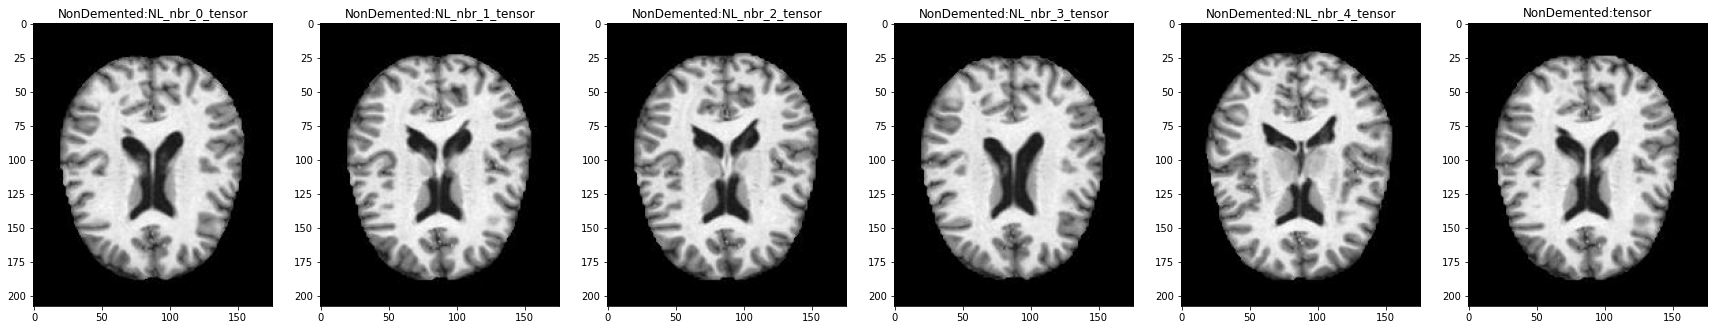

In [ ]:
'''parse train_graph_examples without clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed train_graph examples without clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data without any cluster algorithms

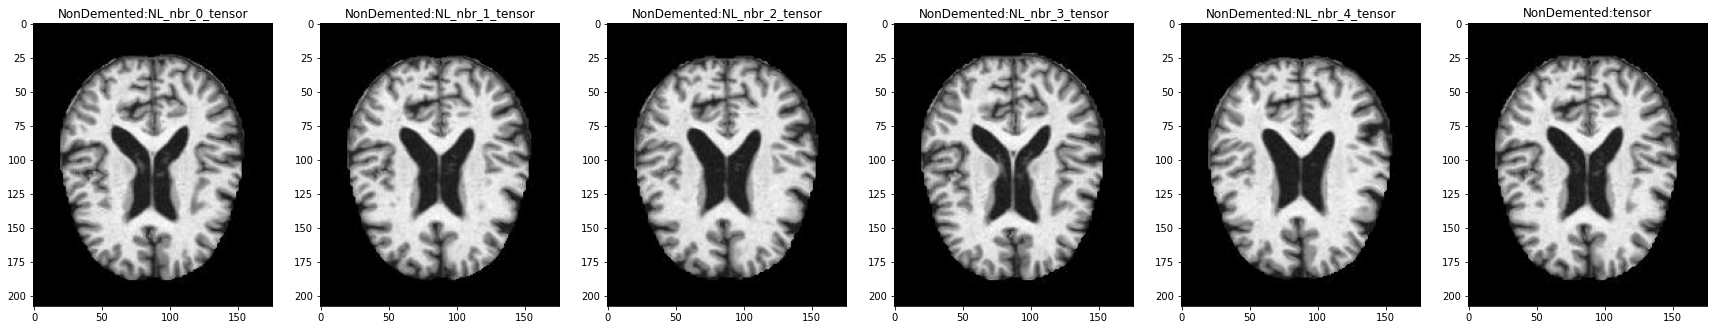

In [ ]:
'''merge test examples without clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_test= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_test.generate_node_nbrs_tfr(output_file_path=test_tfr_path)

'''parse test_graph_examples'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed test_graph examples with examples'''
label = tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate train graph data with Hierarchical clusters

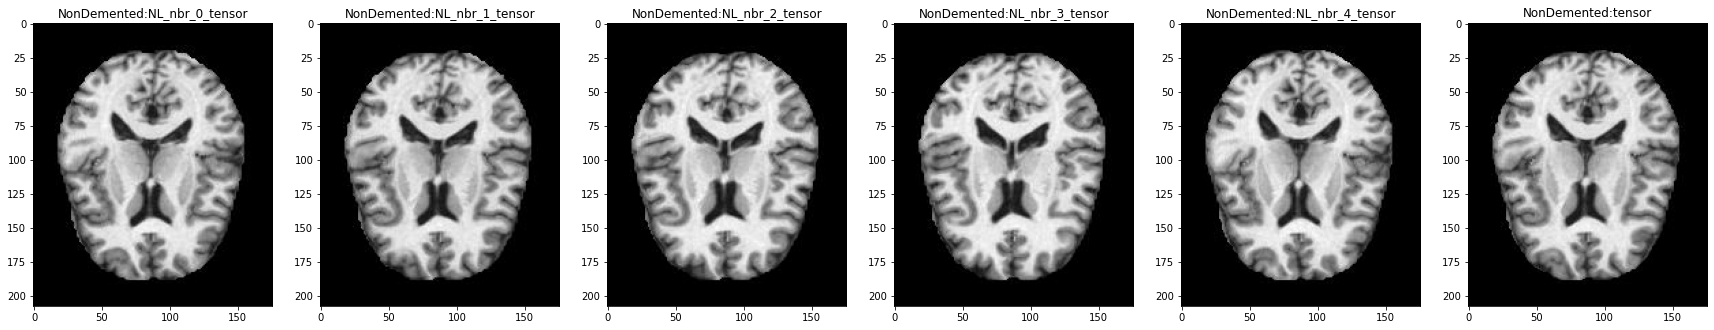

In [ ]:
'''merge train examples with the graph ( hierarchical clusters)'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

'''parse train_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()

'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data with Hierarchical clusters

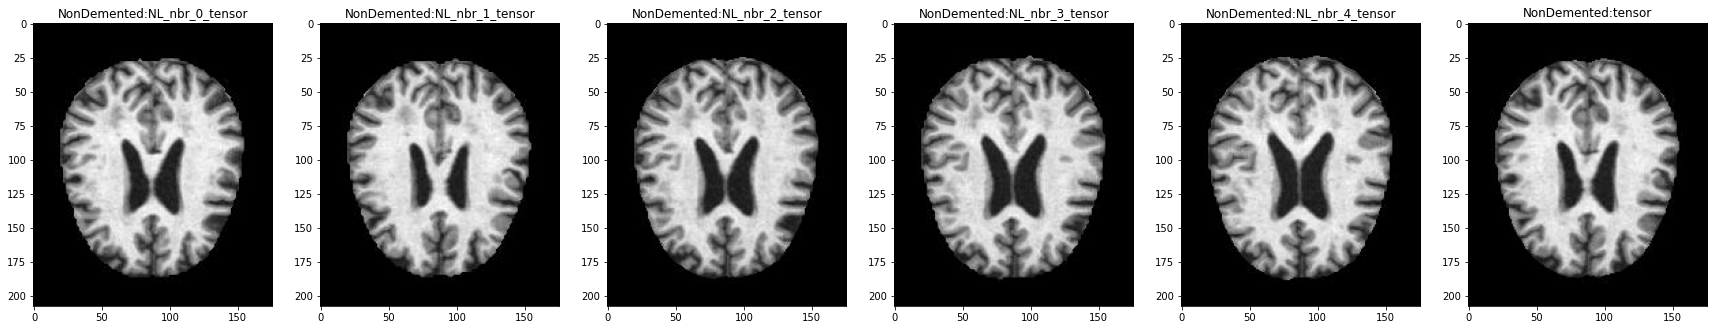

In [ ]:
'''merge test examples with the graph clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=test_tfr_path)
'''parse test_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(test_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate train graph data with Kmeans clusters

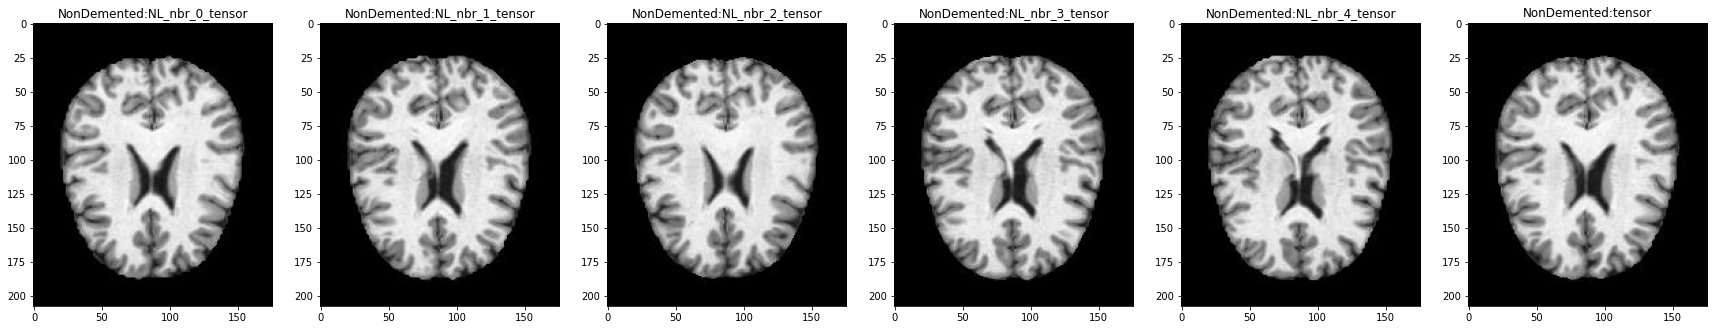

In [ ]:
'''merge train examples with the graph (with clusters)'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_kmeans.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

'''parse train_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data with Kmeans clusters

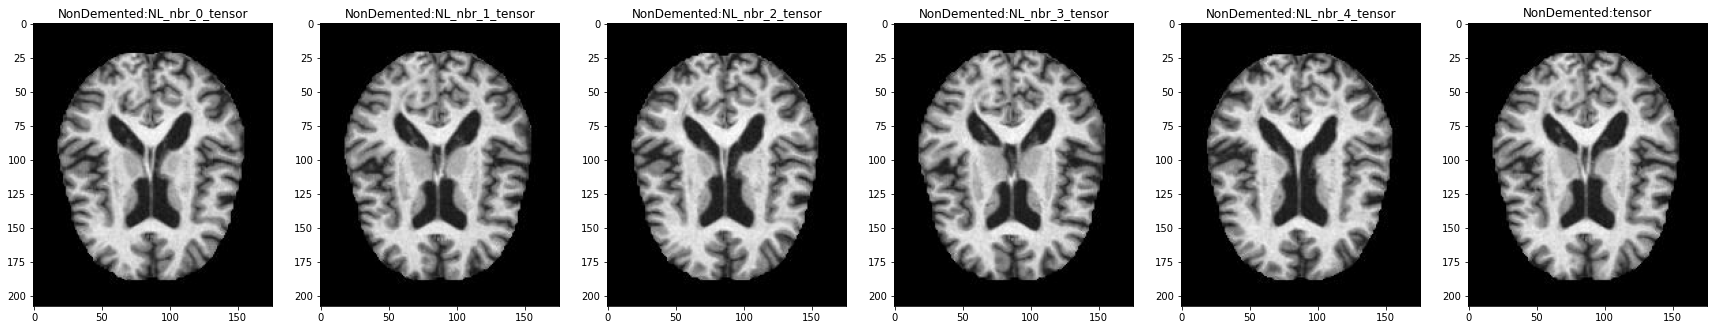

In [ ]:
'''merge test examples with the graph clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_kmeans.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=test_tfr_path)
'''parse test_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(test_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

# 6.Train Models

In [ ]:
'''import python file for NSL data format processing'''
from nsl_data_processing import GenerateTrainTestDict, NSLDataFormat
from AD_model_builder import AD_params, ADModelBuilder, AccEarlyStop

In [ ]:
'''define CNN base model'''

def build_base_model(): 
    ipt= tf.keras.Input(shape=(100,100,3), name='tensor')
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv1')(ipt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv2')(ipt)
    opt= tf.keras.layers.BatchNormalization(name='block1_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block1_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block1_pool')(opt)

    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv1')(opt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv2')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block2_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block2_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block2_pool')(opt)

    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block3_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block3_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block3_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block3_pool')(opt)
    
    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block4_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block4_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block4_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block4_pool')(opt)

    opt= tf.keras.layers.Flatten()(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(64)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(4, activation='softmax')(opt)
    
    base_model = tf.keras.Model(ipt,opt)
    return base_model

## Train base model with images

In [ ]:
'''load data for base model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
'''train base model'''
base_model = build_base_model()
# METRICS = [tf.keras.metrics.CategoricalAccuracy(name='cac')]
METRICS = [tf.keras.metrics.AUC(name='auc')]
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                   loss=tf.losses.CategoricalCrossentropy(), 
                   metrics=METRICS)
history = base_model.fit(train_image_dataset,
                         validation_data=test_image_dataset,
                         callbacks = [ValAccEarlyStopping(val_acc_base=0.90)],
                         epochs=100,
                         verbose=1)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


32/32 [==============================] - 9s 285ms/step - loss: 1.7415 - auc: 0.5472 - val_loss: 1.5066 - val_auc: 0.4322
Epoch 2/100
32/32 [==============================] - 9s 281ms/step - loss: 1.5632 - auc: 0.6258 - val_loss: 1.7132 - val_auc: 0.4764
Epoch 3/100
32/32 [==============================] - 9s 275ms/step - loss: 1.4634 - auc: 0.6625 - val_loss: 1.6979 - val_auc: 0.4341
Epoch 4/100
32/32 [==============================] - 9s 273ms/step - loss: 1.4107 - auc: 0.6840 - val_loss: 1.4581 - val_auc: 0.5584
Epoch 5/100
32/32 [==============================] - 9s 269ms/step - loss: 1.3710 - auc: 0.6976 - val_loss: 1.2590 - val_auc: 0.7220
Epoch 6/100
32/32 [==============================] - 9s 273ms/step - loss: 1.3025 - auc: 0.7220 - val_loss: 1.2124 - val_auc: 0.7189
Epoch 7/100
32/32 [==============================] - 9s 274ms/step - loss: 1.2783 - auc: 0.7307 - val_loss: 1.1930 - val_auc: 0.7219
Epoch 8/100
32/32 [==============================] - 9s 270ms/step - loss: 1.2660

In [ ]:
base_model.save('/content/drive/My Drive/Projects/codes/base_model_0823.h5')

In [ ]:
base_model = tf.keras.models.load_model('/content/drive/My Drive/Projects/codes/base_model_0823.h5')

In [ ]:
results = base_model.evaluate(test_image_dataset)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


14/14 [==============================] - 2s 169ms/step - loss: 1.5930 - auc: 0.7982
[1.593024492263794, 0.7981645464897156]


## Train NSL model with image graphs without clusters

In [ ]:
'''load data wihtout clusters in the graph for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 64
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_no_cluster.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training wihtout clusters '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     71/Unknown - 32s 454ms/step - loss: 1.5550 - accuracy: 0.3809 - auc: 0.6382 - f1_score: 0.3321 - scaled_graph_loss: 0.0318

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


71/71 [==============================] - 36s 504ms/step - loss: 1.5550 - accuracy: 0.3809 - auc: 0.6382 - f1_score: 0.3321 - scaled_graph_loss: 0.0318 - val_loss: 1.2157 - val_accuracy: 0.4901 - val_auc: 0.7391 - val_f1_score: 0.2627
Epoch 2/50
71/71 [==============================] - 35s 499ms/step - loss: 1.3965 - accuracy: 0.4422 - auc: 0.6975 - f1_score: 0.4019 - scaled_graph_loss: 0.0261 - val_loss: 1.1112 - val_accuracy: 0.5036 - val_auc: 0.7518 - val_f1_score: 0.2506
Epoch 3/50
71/71 [==============================] - 36s 507ms/step - loss: 1.2922 - accuracy: 0.4665 - auc: 0.7297 - f1_score: 0.4249 - scaled_graph_loss: 0.0232 - val_loss: 1.1080 - val_accuracy: 0.5036 - val_auc: 0.8225 - val_f1_score: 0.5036
Epoch 4/50
71/71 [==============================] - 36s 512ms/step - loss: 1.2404 - accuracy: 0.4978 - auc: 0.7500 - f1_score: 0.4452 - scaled_graph_loss: 0.0212 - val_loss: 1.1265 - val_accuracy: 0.5036 - val_auc: 0.8238 - val_f1_score: 0.5039
Epoch 5/50
71/71 [=============

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_noClusters_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

30/30 [==============================] - 3s 92ms/step - loss: 1.1253 - accuracy: 0.6038 - auc: 0.8438 - f1_score: 0.5869
[1.1253172159194946, 0.603753924369812, 0.8438157439231873, 0.586920976638794]


## Train NSL model with image graphs with Kmeans clusters

In [ ]:
from nsl_data_processing import NSLDataFormat

In [ ]:
'''load data for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 64
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_kmeans.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     70/Unknown - 33s 476ms/step - loss: 1.2034 - accuracy: 0.4781 - auc: 0.7525 - f1_score: 0.4178 - scaled_graph_loss: 0.0168

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


70/70 [==============================] - 37s 527ms/step - loss: 1.2034 - accuracy: 0.4781 - auc: 0.7525 - f1_score: 0.4178 - scaled_graph_loss: 0.0168 - val_loss: 1.3238 - val_accuracy: 0.5037 - val_auc: 0.8172 - val_f1_score: 0.4478
Epoch 2/50
70/70 [==============================] - 36s 513ms/step - loss: 1.0033 - accuracy: 0.5432 - auc: 0.8203 - f1_score: 0.4837 - scaled_graph_loss: 0.0098 - val_loss: 1.5282 - val_accuracy: 0.5037 - val_auc: 0.8131 - val_f1_score: 0.5037
Epoch 3/50
70/70 [==============================] - 36s 512ms/step - loss: 0.9237 - accuracy: 0.5676 - auc: 0.8424 - f1_score: 0.5059 - scaled_graph_loss: 0.0081 - val_loss: 1.5918 - val_accuracy: 0.5037 - val_auc: 0.7926 - val_f1_score: 0.5037
Epoch 4/50
70/70 [==============================] - 36s 514ms/step - loss: 0.8909 - accuracy: 0.5864 - auc: 0.8548 - f1_score: 0.5317 - scaled_graph_loss: 0.0069 - val_loss: 1.2131 - val_accuracy: 0.5327 - val_auc: 0.8083 - val_f1_score: 0.5240
Epoch 5/50
70/70 [=============

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_kmeans_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

30/30 [==============================] - 3s 91ms/step - loss: 1.5054 - accuracy: 0.7120 - auc: 0.8567 - f1_score: 0.7119
[1.50538170337677, 0.7120253443717957, 0.8567445278167725, 0.7118733525276184]


## Train NSL model with image graphs with Hierarchical clusters

In [ ]:
'''load data for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 64
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_aae_hierarchy.tsv')
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     70/Unknown - 33s 472ms/step - loss: 1.6187 - accuracy: 0.3216 - auc: 0.5810 - f1_score: 0.2498 - scaled_graph_loss: 0.0271

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


70/70 [==============================] - 37s 527ms/step - loss: 1.6187 - accuracy: 0.3216 - auc: 0.5810 - f1_score: 0.2498 - scaled_graph_loss: 0.0271 - val_loss: 1.4494 - val_accuracy: 0.1347 - val_auc: 0.6144 - val_f1_score: 0.1953
Epoch 2/50
70/70 [==============================] - 35s 507ms/step - loss: 1.4357 - accuracy: 0.4139 - auc: 0.6619 - f1_score: 0.3427 - scaled_graph_loss: 0.0232 - val_loss: 1.2183 - val_accuracy: 0.5050 - val_auc: 0.7465 - val_f1_score: 0.0000e+00
Epoch 3/50
70/70 [==============================] - 36s 514ms/step - loss: 1.3402 - accuracy: 0.4535 - auc: 0.7020 - f1_score: 0.3825 - scaled_graph_loss: 0.0210 - val_loss: 1.0688 - val_accuracy: 0.5227 - val_auc: 0.8216 - val_f1_score: 0.2245
Epoch 4/50
70/70 [==============================] - 36s 520ms/step - loss: 1.2860 - accuracy: 0.4835 - auc: 0.7251 - f1_score: 0.4120 - scaled_graph_loss: 0.0197 - val_loss: 1.0630 - val_accuracy: 0.5070 - val_auc: 0.8247 - val_f1_score: 0.4794
Epoch 5/50
70/70 [=========

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_hiercharhical_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

30/30 [==============================] - 3s 93ms/step - loss: 1.0075 - accuracy: 0.5791 - auc: 0.8380 - f1_score: 0.4571
[1.007472038269043, 0.5791122913360596, 0.8380376100540161, 0.45708584785461426]
